In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Importing the datasets

train = pd.read_csv('F:\\Learning\\Hackathons\\Kaggle\\Titanic\\train.csv')
test = pd.read_csv('F:\\Learning\\Hackathons\\Kaggle\\Titanic\\test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
1,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
2,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
3,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
4,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Combining the datasets

In [7]:
df = pd.concat([train.drop(columns=['Survived']),test]).reset_index()

In [8]:
df.shape

(1309, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [10]:
df.isnull().sum()

index             0
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [12]:
df.Pclass.unique()

array([1, 3, 2], dtype=int64)

In [13]:
#defining an empty list with same length as the combined data
Sur = [None]*len(df) 

#adding the empty list to the data
df['Survived'] = Sur 

In [14]:
#populating the empty column from the training data
#the column will be populated as 'NA' for test data

check = 0 #initiating a temporary variable
for i,e in enumerate(df.index):
    #check = 0
    if check == 0:
        df['Survived'].loc[e]=train['Survived'].loc[e]
        if e == 890:
            check = 1
    else:
        df["Survived"].loc[e] = 'NA'

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df.loc[889:893]

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
889,889,541,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S,1
890,890,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0
891,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NA
892,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NA
893,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NA


In [16]:
# defining an empty list where individual titles will be stored
title_all = []

In [17]:
# defining a dictionary for mapping purposes
marital_status = {'Mr.' : 'Married',
                 'Mrs.' : 'Married',
                 'Master.' : 'Un-Married',
                 'Miss' : 'Un-Married',
                 'Ms.' : 'Un-Married'}

In [18]:
# running nested-loops to populate the titles into the list

for i,n in enumerate(df.Name):
    for j,t in enumerate(list(marital_status.keys())):
        #check = n.find(t)
        if n.find(t) > -1:
            #title_all.append(''.join([str(i),t]))
            title_all.append(marital_status.get(t))
            break;
        elif j>3:
            title_all.append('Others')

In [19]:
df['Title_Status'] = title_all

In [20]:
df.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title_Status
0,0,546,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S,0,Married
1,1,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,Married
2,2,75,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1,Married
3,3,170,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0,Married
4,4,510,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1,Married


In [21]:
df.groupby(['Sex','Title_Status'])['Age'].agg(['count','mean'])

count       mean
Sex    Title_Status                  
female Married         170  36.994118
       Others            7  34.428571
       Un-Married      211  21.803744
male   Married         581  32.252151
       Others           24  45.666667
       Un-Married       53   5.482642

In [22]:
for i,e in enumerate(list(df[(df.Sex=='female') & (df.Title_Status == 'Married') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 36.9

In [23]:
for i,e in enumerate(list(df[(df.Sex=='female') & (df.Title_Status == 'Un-Married') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 21.8

In [24]:
for i,e in enumerate(list(df[(df.Sex=='female') & (df.Title_Status == 'Others') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 34.4

In [25]:
for i,e in enumerate(list(df[(df.Sex=='male') & (df.Title_Status == 'Others') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 45.6

In [26]:
for i,e in enumerate(list(df[(df.Sex=='male') & (df.Title_Status == 'Un-Married') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 5.4

In [27]:
for i,e in enumerate(list(df[(df.Sex=='male') & (df.Title_Status == 'Married') & (df.Age.isnull())].index)):
    df.at[e, 'Age'] = 32.2

In [28]:
df.isnull().sum()

index              0
PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Survived           0
Title_Status       0
dtype: int64

In [29]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [30]:
df['Fare'].fillna( df['Fare'].mean(), inplace = True)

In [54]:
df.isnull().sum()

index              0
PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin           1014
Embarked           0
Survived           0
Title_Status       0
Family_Size        0
dtype: int64

No null values remain

#### Adding new features

In [31]:
# additional feature # 1
df['Family_Size'] = df['SibSp'] + df['Parch']

In [32]:
# additional feature # 2
df_ticket = pd.DataFrame(data = df.Ticket.value_counts())
df_ticket = df_ticket.reset_index()
df_ticket.rename(columns = {'index':'Ticket',
                           'Ticket' : 'Group_Size'}, 
                 inplace = True)
df_ticket.head()

,Ticket,Group_Size
0,CA. 2343,11
1,1601,8
2,CA 2144,8
3,347077,7
4,347082,7


In [33]:
df_ticket['Group_Size'] = df_ticket['Group_Size'] - 1

In [34]:
df_1 = pd.merge(df,
               df_ticket,
               on = 'Ticket',
               how = 'left')

In [35]:
# dropping columns
df_1 = df_1.drop(columns = ['PassengerId','Name','index','Cabin'])

In [36]:
# importing required libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [37]:
ss = StandardScaler()

#### Transforming Fare column

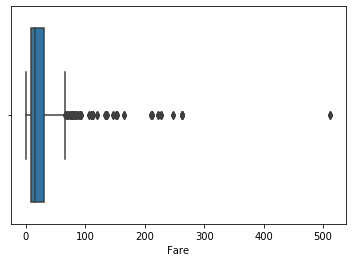

In [38]:
sns.boxplot(data=df_1,x=df_1['Fare'])

In [39]:
# identifying quartile range
Q1=df_1['Fare'].quantile(0.25)
Q3=df_1['Fare'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 is :',Q1)
print('Q3 is :',Q3)
print('IQR is :',IQR)

Q1 is : 7.8958
Q3 is : 31.275
IQR is : 23.379199999999997


In [40]:
# defining lower and upper whiskers for trimming the data
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

In [41]:
print(Lower_Whisker, Upper_Whisker)

-27.172999999999995 66.34379999999999


In [42]:
df_1['Fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [43]:
# replacing all values higher than upper whisker with upper whisker value
for e in (list(df_1[df_1.Fare > 66.4].index)):
    df_1.at[e,'Fare'] = Upper_Whisker

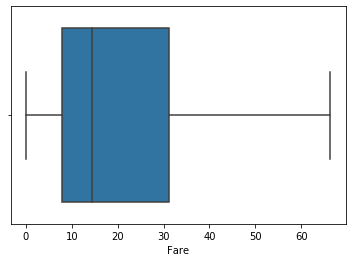

In [44]:
sns.boxplot(data=df_1,x=df_1['Fare'])

In [45]:
df_1.Fare.describe()

count    1309.000000
mean       24.294090
std        20.789206
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max        66.343800
Name: Fare, dtype: float64

In [46]:
df_1['Fare_sc'] = ss.fit_transform(df_1['Fare'].values.reshape(-1,1))

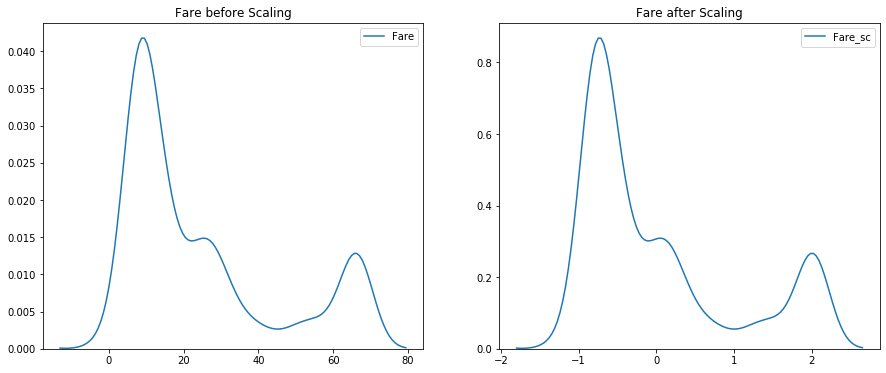

In [47]:
# plot original distribution plot with larger value feature
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(15, 6))
ax0.set_title('Fare before Scaling')
ax1.set_title('Fare after Scaling')

sns.kdeplot(df_1['Fare'], ax=ax0)
sns.kdeplot(df_1['Fare_sc'], ax=ax1)

In [48]:
df_1.Fare_sc.describe()

count    1.309000e+03
mean     9.483332e-17
std      1.000382e+00
min     -1.169038e+00
25%     -7.890901e-01
50%     -4.734981e-01
75%      3.359233e-01
max      2.023443e+00
Name: Fare_sc, dtype: float64

#### Transforming Age Column

In [49]:
df_1.Age.describe()

count    1309.000000
mean       29.885233
std        13.195374
min         0.170000
25%        21.800000
50%        30.000000
75%        36.000000
max        80.000000
Name: Age, dtype: float64

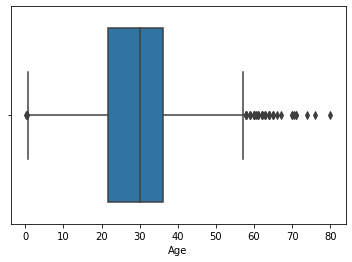

In [50]:
sns.boxplot(data=df_1,x=df_1['Age'])

In [51]:
df_1['Age_sc'] = ss.fit_transform(df_1['Age'].values.reshape(-1,1))

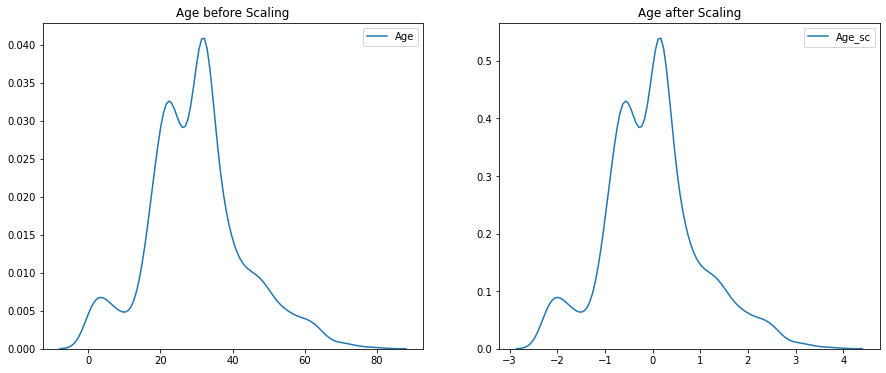

In [52]:
# plot original distribution plot with larger value feature
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(15, 6))
ax0.set_title('Age before Scaling')
ax1.set_title('Age after Scaling')

sns.kdeplot(df_1['Age'], ax=ax0)
sns.kdeplot(df_1['Age_sc'], ax=ax1)

In [53]:
df_1.Age_sc.describe()

count    1.309000e+03
mean    -3.107607e-16
std      1.000382e+00
min     -2.252804e+00
25%     -6.129666e-01
50%      8.700842e-03
75%      4.635794e-01
max      3.799356e+00
Name: Age_sc, dtype: float64

In [55]:
df_1.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title_Status,Family_Size,Group_Size,Fare_sc,Age_sc
0,1,male,64.0,0,0,693,26.0000,S,0,Married,0,0,0.082089,2.586346
1,1,male,33.0,0,0,695,5.0000,S,0,Married,0,0,-0.928437,0.236140
2,3,male,32.0,0,0,1601,56.4958,S,1,Married,0,7,1.549555,0.160327
3,3,male,28.0,0,0,1601,56.4958,S,0,Married,0,7,1.549555,-0.142925
4,3,male,26.0,0,0,1601,56.4958,S,1,Married,0,7,1.549555,-0.294552


In [56]:
df_2 = df_1.drop(columns = ['Age','Fare'])

In [57]:
df_2.head()

,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Survived,Title_Status,Family_Size,Group_Size,Fare_sc,Age_sc
0,1,male,0,0,693,S,0,Married,0,0,0.082089,2.586346
1,1,male,0,0,695,S,0,Married,0,0,-0.928437,0.236140
2,3,male,0,0,1601,S,1,Married,0,7,1.549555,0.160327
3,3,male,0,0,1601,S,0,Married,0,7,1.549555,-0.142925
4,3,male,0,0,1601,S,1,Married,0,7,1.549555,-0.294552


In [58]:
df_2.to_excel('F:\\Learning\\Hackathons\\Kaggle\\Titanic\\df_Part1_cleaned.xlsx', index = False)